# Predicting Used Car Prices in India

## Introduction

The following notebook contains an analysis that uses data on used car sales in India to gain insights into the factors that affect the selling price of a used car and the objective is to be able to predict the price that a used car will sell for using regression techniques.

The aim of the project is to be able to price a used car that has not yet been sold based on its features and prices of other similar cars that have been sold.

Data was obtained from CarDekho - an online used car sales platform. The dataset contains information on used cars previously sold on the website.

The dataset was obtained from Nehal Birla via Kaggle:
https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho

The columns in the dataset are as follows:
- __name__ <br>The manufacturer and model of the car<br>
- __year__ <br>The year in which the car was sold
- __selling_price__ <br>The price at which the car was sold in Indian Rupees
- __km_driven__ <br>The number of kilometers driven in the car
- __fuel__ <br>The fuel type used by the car
- __seller_type__ <br>The type of seller of the car (e.g. individual, dealer etc.)
- __transmission__ <br>Whether the car is automatic or manual
- __owner__ <br>Whether the owner of the car was the first owner/ second owner etc.

The analysis will be split into the following sections:<br>
>__1. Importing and Examination__<br><br>
__2. Data Cleaning__<br><br>
__3. Exploratory Data Analysis__<br><br>
__4. Feature Engineering__<br><br>
__5. Model Building__<br><br>
__6. Conclusion__<br><br>

## 1. Importing and examining the dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('used_cars.csv')
df.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [4]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [5]:
df[df.isnull().any(axis=1)].head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
13,Maruti Swift 1.3 VXi,2007,200000,80000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
31,Fiat Palio 1.2 ELX,2003,70000,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
78,Tata Indica DLS,2003,50000,70000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
87,Maruti Swift VDI BSIV W ABS,2015,475000,78000,Diesel,Dealer,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
119,Maruti Swift VDI BSIV,2010,300000,120000,Diesel,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
138,BMW X1 sDrive 20D xLine,2017,2150000,27000,Diesel,Dealer,Automatic,First Owner,NaN,NaN,NaN,NaN,NaN
200,Toyota Etios GD,2012,235000,120000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
206,Maruti Omni E 8 Str STD,2003,40000,90000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
228,Maruti Swift 1.3 VXi,2008,130000,120000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
252,Tata Indica DLS,2005,75000,110000,Diesel,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN


It is worth noting that where there are missing values, all of the five last columns (mileage - seats) are missing data. These will be dealt with in the data cleaning section below.

In [6]:
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


## 2. Data Cleaning

#### Dropping rows with null values

As identified in Section 1, instances with null values largely have missing data across all of the last last five columns. As it would be inaccurate to impute all of these missing values and null entries make up only a small percentage of the dataset, these instances will be dropped.

In [7]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7906 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7906 non-null   object 
 1   year           7906 non-null   int64  
 2   selling_price  7906 non-null   int64  
 3   km_driven      7906 non-null   int64  
 4   fuel           7906 non-null   object 
 5   seller_type    7906 non-null   object 
 6   transmission   7906 non-null   object 
 7   owner          7906 non-null   object 
 8   mileage        7906 non-null   object 
 9   engine         7906 non-null   object 
 10  max_power      7906 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7906 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 864.7+ KB


#### Separating the manufacturer from the model in the car name

The name column current contains the car manufacturer and model together. These will be split as having them as separate features will be more useful in this analysis.

In [8]:
df['manufacturer'] = df['name'].apply(lambda x: x.split(' ')[0])
df['model'] = df['name'].apply(lambda x: x.split(' ', maxsplit=1)[1])

# Placing manufacturer and model columns at the front, selling_price at the end and removing name column
df = df[['manufacturer', 'model'] + [col for col in df if col not in ['manufacturer', 'model', 'selling_price']] + ['selling_price']]
df.drop(columns=['name'], inplace=True)

df.head()

,manufacturer,model,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,selling_price
0,Maruti,Swift Dzire VDI,2014,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,450000
1,Skoda,Rapid 1.5 TDI Ambition,2014,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,370000
2,Honda,City 2017-2020 EXi,2006,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,158000
3,Hyundai,i20 Sportz Diesel,2010,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,225000
4,Maruti,Swift VXI BSIII,2007,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,130000


#### Converting year to age

The car purchase year will be subtracted from 2020 (year when the data was scraped) to calculate the car age which will be a more meaningful number for data visualisation.

In [9]:
df['age'] = 2020 - df['year']

# Placing age column in index 2 and removing year column
df = df[['manufacturer', 'model', 'age'] + [col for col in df if col not in ['manufacturer', 'model', 'age', 'selling_price']] + ['selling_price']]
df.drop(columns=['year'], inplace=True)

df.head()

,manufacturer,model,age,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,selling_price
0,Maruti,Swift Dzire VDI,6,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,450000
1,Skoda,Rapid 1.5 TDI Ambition,6,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,370000
2,Honda,City 2017-2020 EXi,14,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,158000
3,Hyundai,i20 Sportz Diesel,10,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,225000
4,Maruti,Swift VXI BSIII,13,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,130000


#### Mileage units
The mileage column contains values with mostly kmpl (kilometres per litre) as units but the cars with CNG and LPG fuel types have mileage listed with units km/kg. However, attempting to convert values from km/kg to km/l (by multiplying by the fuel density in kg/m3 to get km/m3 then dividing by 1000 to get km/l) results in extremely unrealistic values.

It is possible that km/l figures were mistakenly reported as km/kg for CNG and LPG fuel types. This is the assumption taken in this study due to the similarity in the km/l and km/kg values.

Some of the instances have a mileage of '0.0 kmpl' which will be treated as null and dropped from the dataset.



In [10]:
filter = (df['mileage'] == '0.0 kmpl')
df.drop(index=df[filter].index, inplace=True)

#### Removing units from the mileage, engine and max_power columns

In [11]:
df['mileage'] = df['mileage'].apply(lambda x: x.split(' ')[0])
df['engine'] = df['engine'].apply(lambda x: x.split(' ')[0])
df['max_power'] = df['max_power'].apply(lambda x: x.split(' ')[0])

# Converting dtypes from object
df[['mileage', 'engine', 'max_power']] = df[['mileage', 'engine', 'max_power']].astype(float)
df['seats'] = df['seats'].astype(int)

df.head()

,manufacturer,model,age,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,selling_price
0,Maruti,Swift Dzire VDI,6,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190Nm@ 2000rpm,5,450000
1,Skoda,Rapid 1.5 TDI Ambition,6,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5,370000
2,Honda,City 2017-2020 EXi,14,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5,158000
3,Hyundai,i20 Sportz Diesel,10,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5,225000
4,Maruti,Swift VXI BSIII,13,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5,130000


#### Dropping torque column
As the brake horsepower has already been calculated in the max_power column, the torque column can be dropped since break horsepower is calculated as follows:

_BHP = Torque x RPM / 5252_

BHP is a more meaningful feature as the torque is measured at different rpms for different cars.

In [12]:
df.drop(columns=['torque'], inplace=True)

df.head()

,manufacturer,model,age,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,selling_price
0,Maruti,Swift Dzire VDI,6,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5,450000
1,Skoda,Rapid 1.5 TDI Ambition,6,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5,370000
2,Honda,City 2017-2020 EXi,14,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5,158000
3,Hyundai,i20 Sportz Diesel,10,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5,225000
4,Maruti,Swift VXI BSIII,13,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5,130000


#### Test Drive Car

As there are only a small number of samples which were test drive cars, these will be classified as First Owner since they are relatively new.

In [13]:
df['owner'].value_counts()

First Owner             5205
Second Owner            2012
Third Owner              508
Fourth & Above Owner     159
Test Drive Car             5
Name: owner, dtype: int64

In [14]:
owner_filter = (df['owner'] == 'Test Drive Car')
df.loc[owner_filter, 'age']

4383    1
4950    1
4951    1
4952    1
6220    1
Name: age, dtype: int64

In [15]:
df['owner'].replace({'Test Drive Car': 'First Owner'}, inplace=True)
df['owner'].value_counts()

First Owner             5210
Second Owner            2012
Third Owner              508
Fourth & Above Owner     159
Name: owner, dtype: int64

#### Manufacturer, Age, Seats

The dataset contains some manufacturers with few entries (less than four). These will be grouped into an 'Other' category so that the training and test sets will contain the same number of features after one hot encoding in Section 4 - Feature Engineering (otherwise a manufacturer will appear in either the training or test set but not both).

This is also the case for the age and seats columns. Although numerical, these variables will be classed as categorical as they are discrete and will be ordinal encoded in Section 4. Ages above 20 will be classed as 21 and number of seats above 10 will be classed as 10 a seater car.

Although not ideal, this is required to ensure that the training and test sets have the same shape so that the model can be properly evaluated.

In [16]:
df['manufacturer'].value_counts()

Maruti           2367
Hyundai          1352
Mahindra          756
Tata              718
Honda             466
Toyota            452
Ford              388
Chevrolet         230
Renault           228
Volkswagen        183
BMW               118
Skoda             104
Nissan             81
Jaguar             71
Volvo              67
Datsun             65
Mercedes-Benz      51
Fiat               41
Audi               40
Lexus              34
Jeep               31
Mitsubishi         14
Force               6
Isuzu               5
Land                5
Kia                 4
Ambassador          4
Daewoo              3
MG                  3
Ashok               1
Opel                1
Name: manufacturer, dtype: int64

In [17]:
df['manufacturer'] = df['manufacturer'].replace(['Ashok', 'Opel', 'MG', 'Daewoo'], 'Other')
df['manufacturer'].value_counts()

Maruti           2367
Hyundai          1352
Mahindra          756
Tata              718
Honda             466
Toyota            452
Ford              388
Chevrolet         230
Renault           228
Volkswagen        183
BMW               118
Skoda             104
Nissan             81
Jaguar             71
Volvo              67
Datsun             65
Mercedes-Benz      51
Fiat               41
Audi               40
Lexus              34
Jeep               31
Mitsubishi         14
Other               8
Force               6
Land                5
Isuzu               5
Kia                 4
Ambassador          4
Name: manufacturer, dtype: int64

In [18]:
df['age'].value_counts()

3     1009
4      856
2      806
5      775
7      666
8      621
6      618
1      582
9      567
10     372
11     229
12     199
13     173
14     102
15      76
0       73
16      51
17      37
18      19
20      15
21      14
22       9
23       9
19       6
26       2
24       2
25       1
Name: age, dtype: int64

In [19]:
df['age'] = df['age'].replace([np.arange(21, 27,1)], 21)
df['age'].value_counts()

3     1009
4      856
2      806
5      775
7      666
8      621
6      618
1      582
9      567
10     372
11     229
12     199
13     173
14     102
15      76
0       73
16      51
21      37
17      37
18      19
20      15
19       6
Name: age, dtype: int64

In [20]:
df['seats'].value_counts()

5     6239
7     1120
8      235
4      133
9       80
6       62
10      19
14       1
Name: seats, dtype: int64

In [21]:
df['seats'] = df['seats'].replace(14, 10)
df['seats'].value_counts()

5     6239
7     1120
8      235
4      133
9       80
6       62
10      20
Name: seats, dtype: int64

## 3. Exploratory Data Analysis

The following section aims to use data visualization to provide a deeper understanding of the various features and to identify trends in the data.

The questions to be answered using EDA are as follows:
- How do the numerical variables affect selling price?
- How do the categorical variables affect selling price?
- What is the distribution of the numerical variables?
- What is the distribution of the categorical variables?
- Which are the most popular car manufacturers?
- How strong is the correlation between numerical features?

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [23]:
sns.set_theme(style='whitegrid', palette='magma')

In [24]:
# Separating numerical and categorical features
# model is left out because of the high number of different car models
# manufacturer will be plotted separately because of the high number of categories
numerical = ['age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']
discrete = ['age', 'seats']
continuous = ['km_driven', 'mileage', 'engine', 'max_power']
categorical = ['fuel', 'seller_type', 'transmission', 'owner']

#### How do the numerical variables vary with selling price?

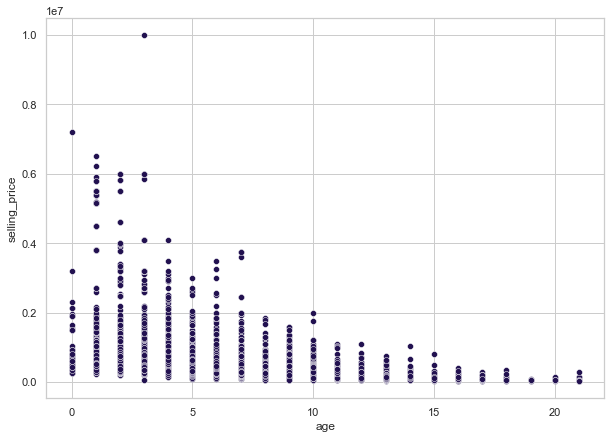

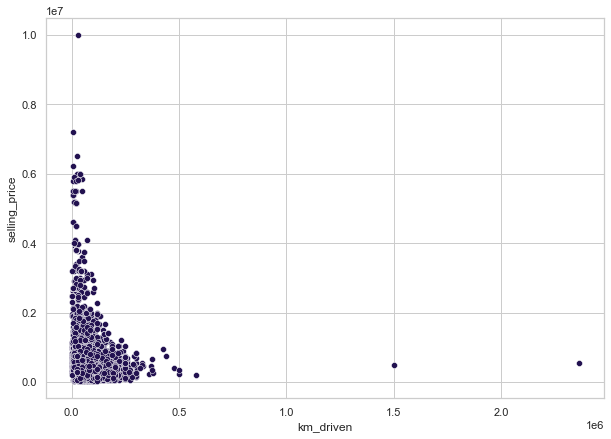

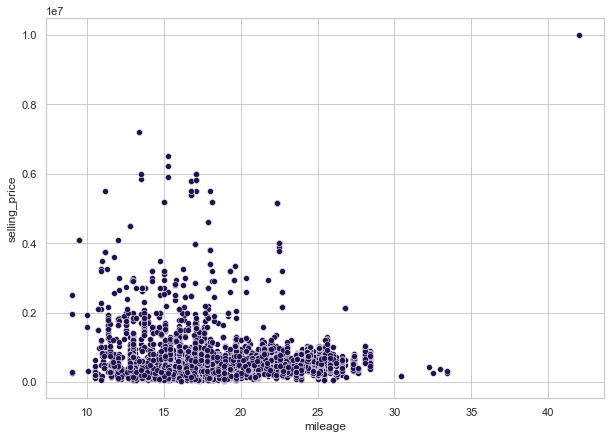

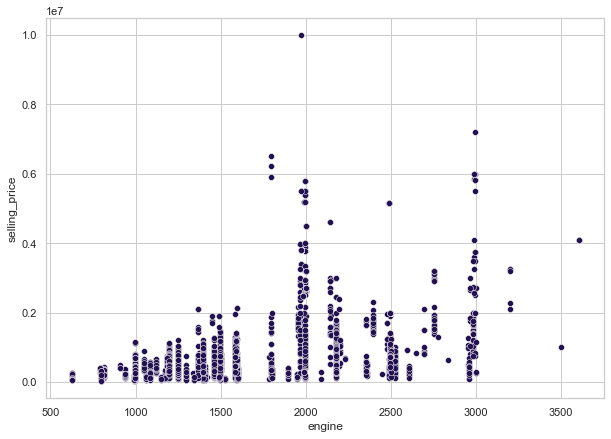

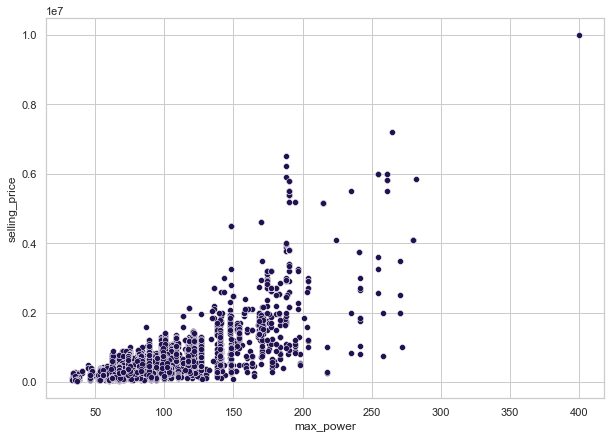

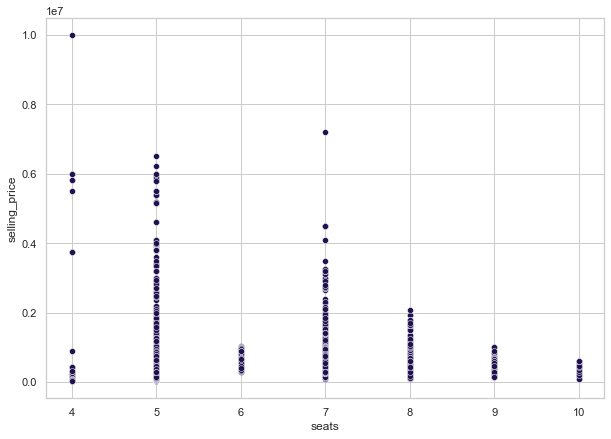

In [25]:
for i in df[numerical].columns:
    plt.figure(figsize=(10, 7))
    sns.scatterplot(x=i, y='selling_price', data=df)
    plt.show()

It is clear from the scatter plots that there is an outlier with a selling price significantly higher than the rest of the cars. However, it does not appear to be a mistake as the high selling price is reasonable since that car also has higher power and higher mileage than the rest of the samples and is also relatively new.

Outliers will not be removed as the extreme cases cannot be ignored. However RobustScaler will be used in Section 4 to transform the data so that models which are sensitive to outliers can still perform well despite the presence of outliers.

#### How do the categorical variables vary with selling price?

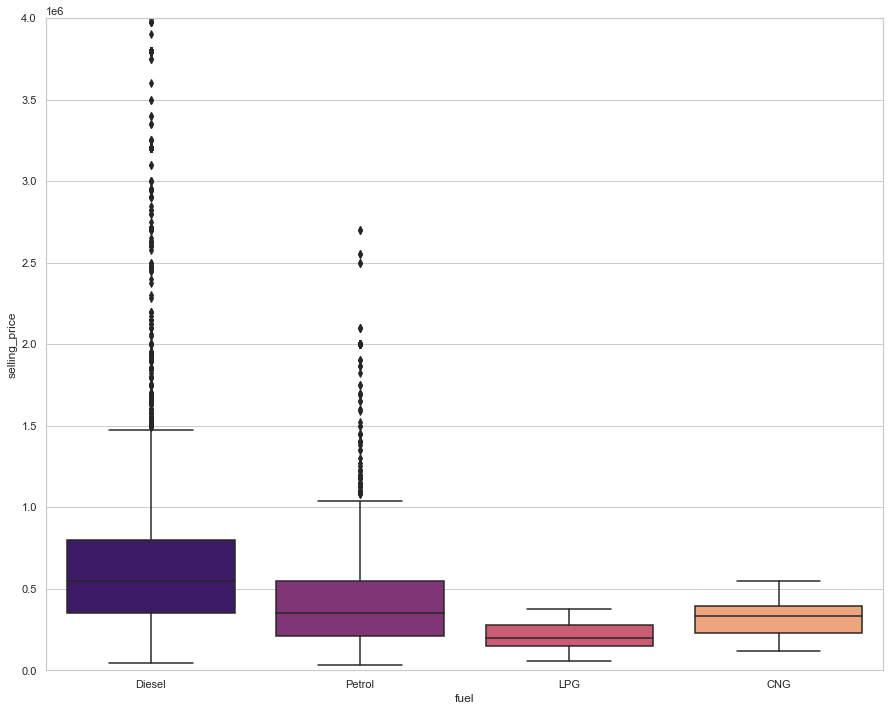

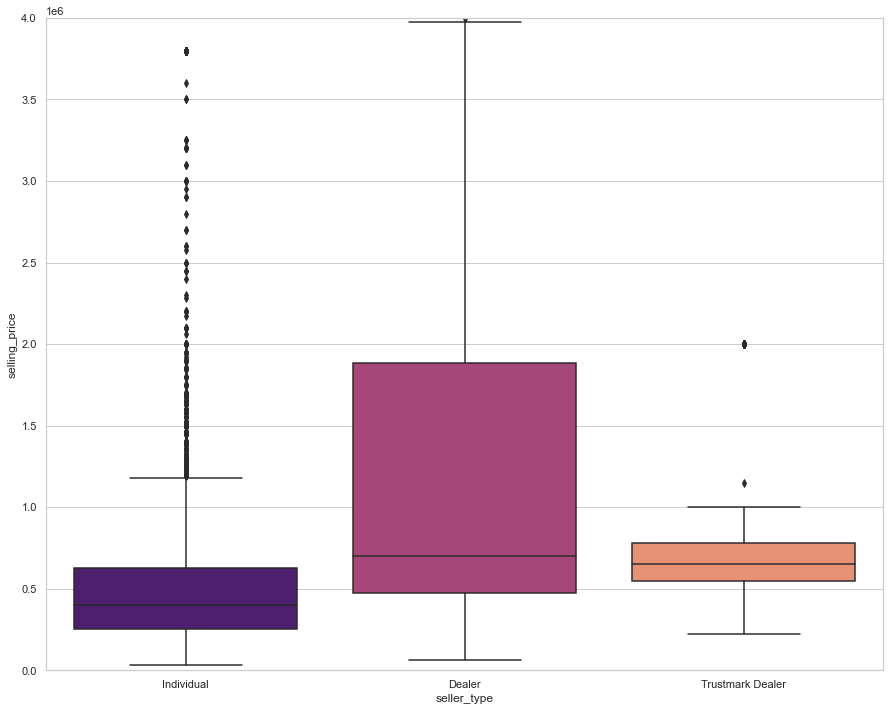

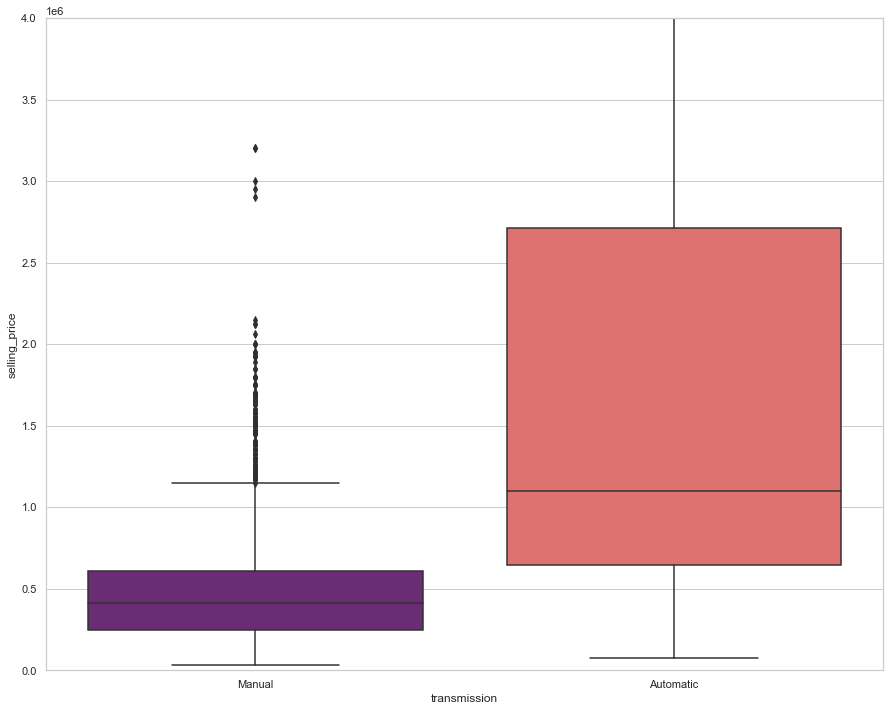

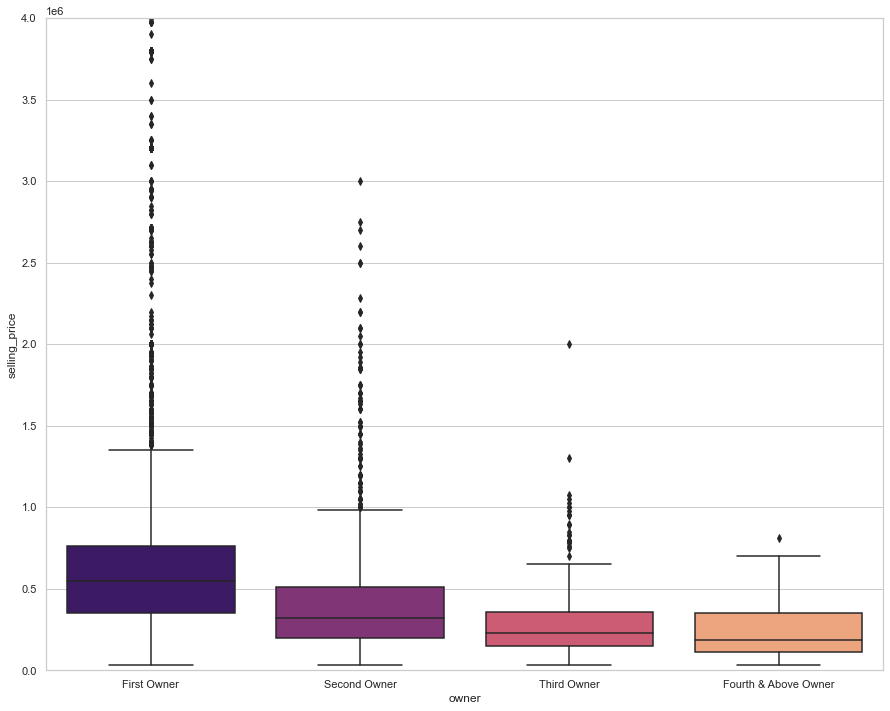

In [26]:
for i in df[categorical].columns:
    plt.figure(figsize=(15, 12))
    sns.boxplot(x=i, y='selling_price', data=df, palette='magma')
    plt.ylim(0, 4000000) #Hiding some outliers for easier visualization
    plt.show()

As expected, automatic cars are worth more than manual cars and the fewer the number of previous owners a car has had, the more it is worth.

It is also interesting to note that cars sold through a dealer have sold for a higher price. This could be due to dealers having access to professional salespeople or a better understanding of the used car market.

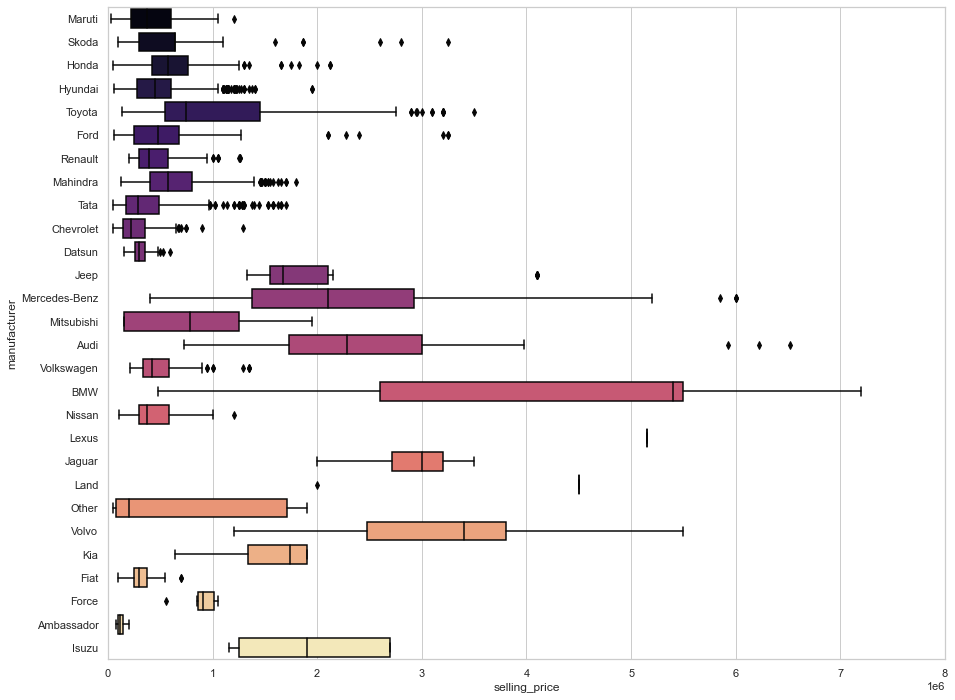

In [27]:
plt.figure(figsize=(15, 12))
sns.boxplot(x='selling_price', y='manufacturer', data=df, palette='magma')
plt.xlim(0, 8000000)
plt.show()

#### What is the distribution of the numerical variables?

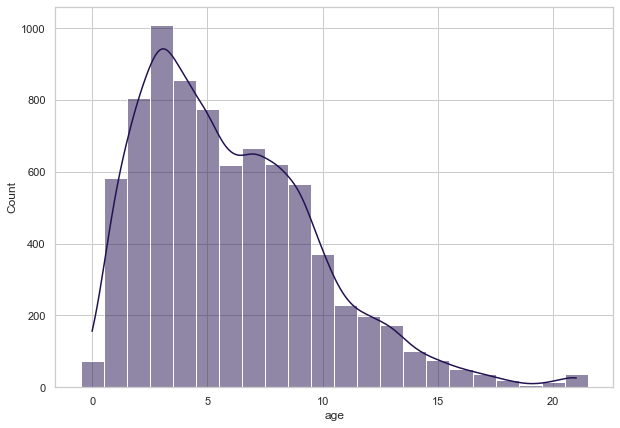

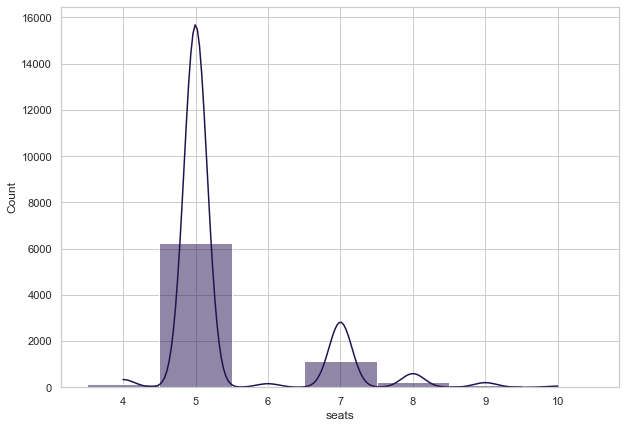

In [28]:
for i in df[discrete].columns:
    plt.figure(figsize=(10, 7))
    sns.histplot(df, x=i, discrete=True, kde=True)
    plt.show()

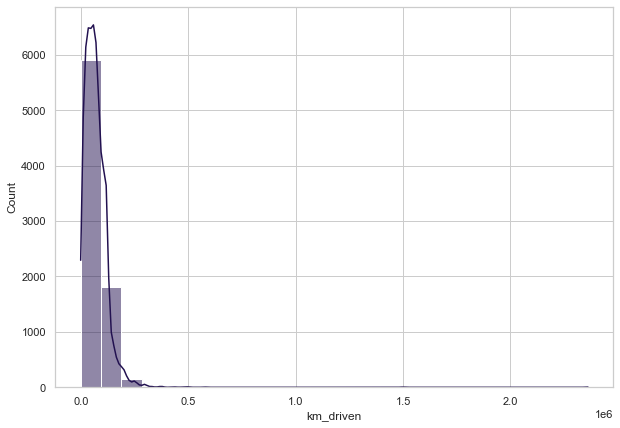

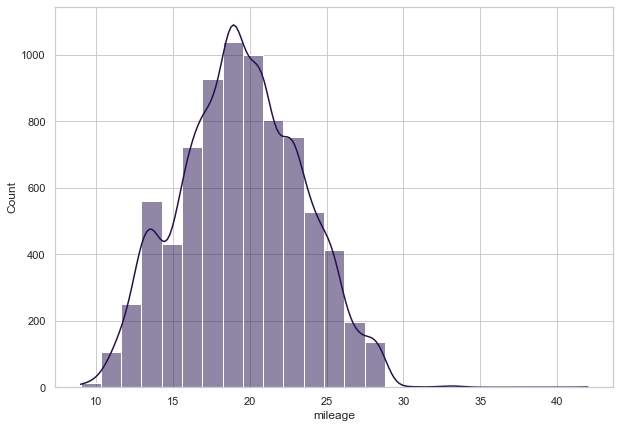

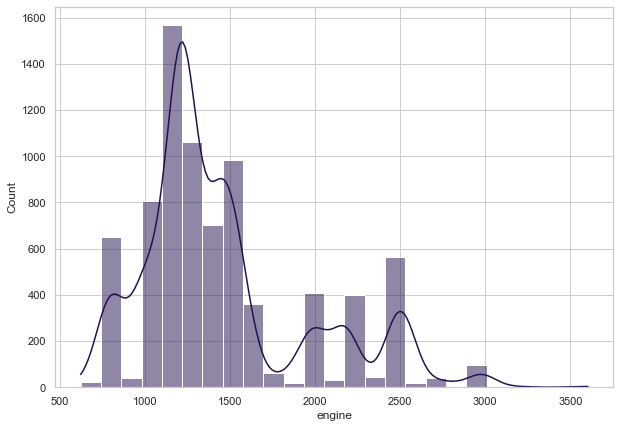

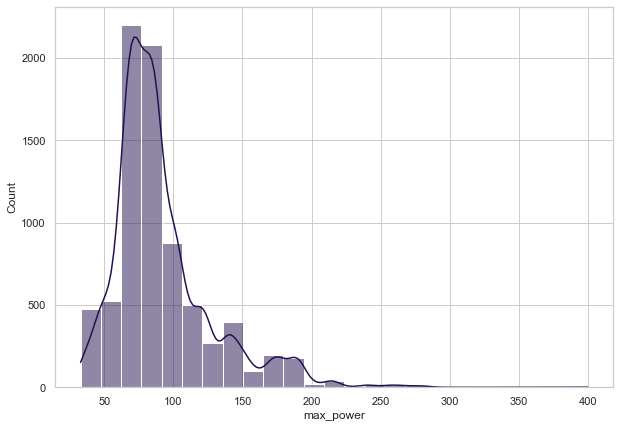

In [29]:
for i in df[continuous].columns:
    plt.figure(figsize=(10, 7))
    sns.histplot(df, x=i, kde=True, bins=25)
    plt.show()

The histograms show that the distribution of the numerical variables is largely positively skewed.

#### What is the distribution of the categorical variables?

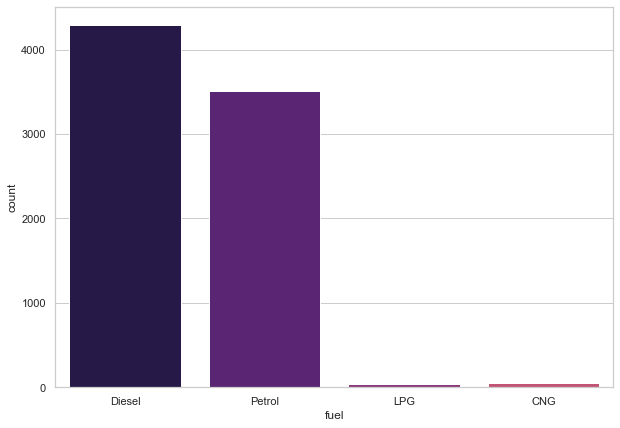

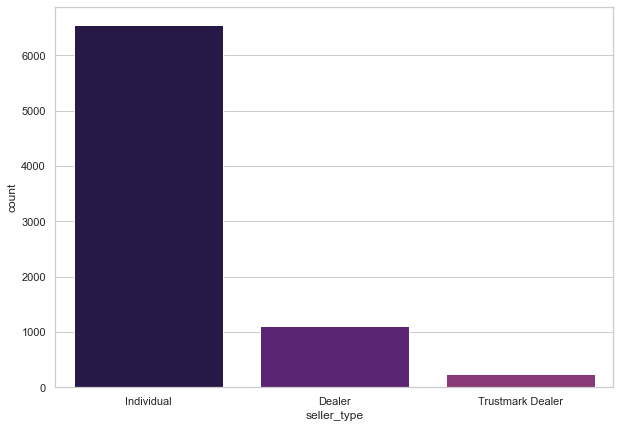

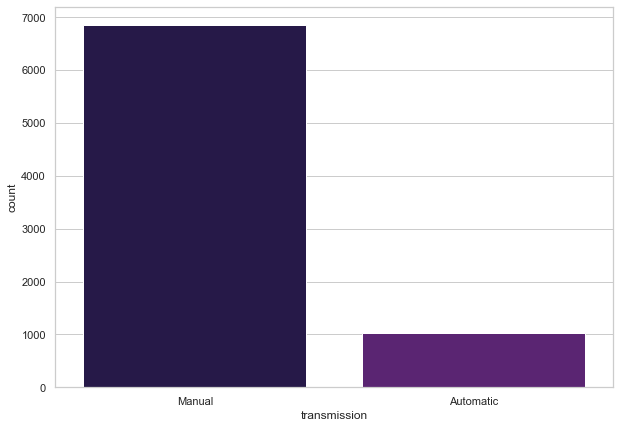

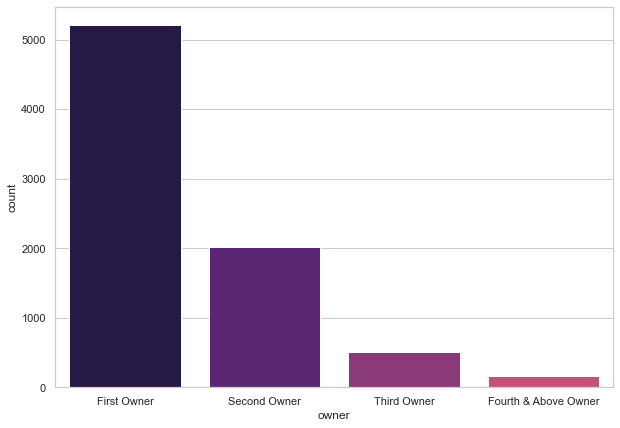

In [30]:
for i in df[categorical].columns:
    plt.figure(figsize=(10, 7))
    sns.countplot(x=i, data=df)
    plt.show()

#### Which are the most popular car manufacturers?

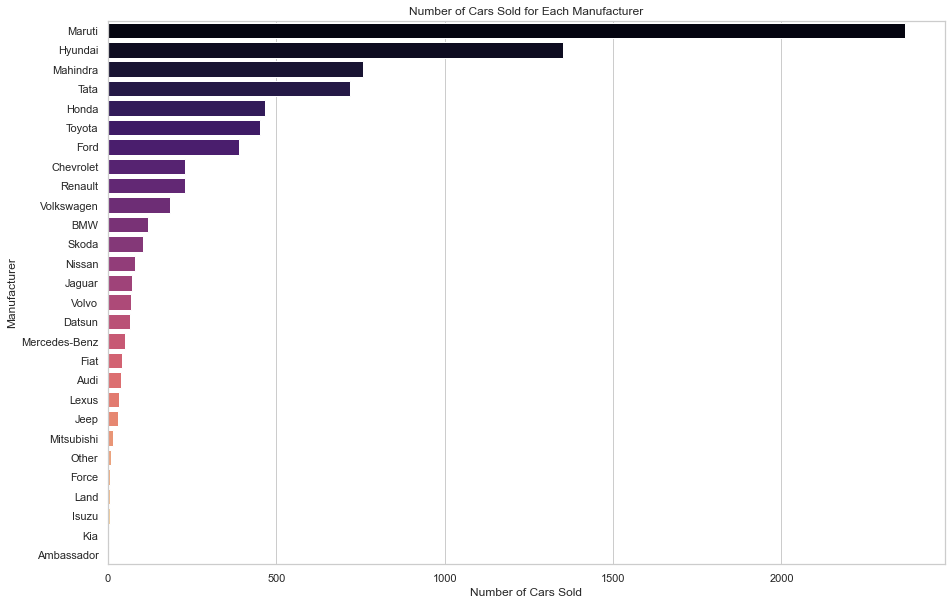

In [31]:
plt.figure(figsize=(15, 10))
sns.countplot(y='manufacturer', data=df, order=df['manufacturer'].value_counts().index, palette='magma')
plt.title('Number of Cars Sold for Each Manufacturer')
plt.xlabel('Number of Cars Sold')
plt.ylabel('Manufacturer')
plt.show()

#### How strong is the correlation between numerical features?

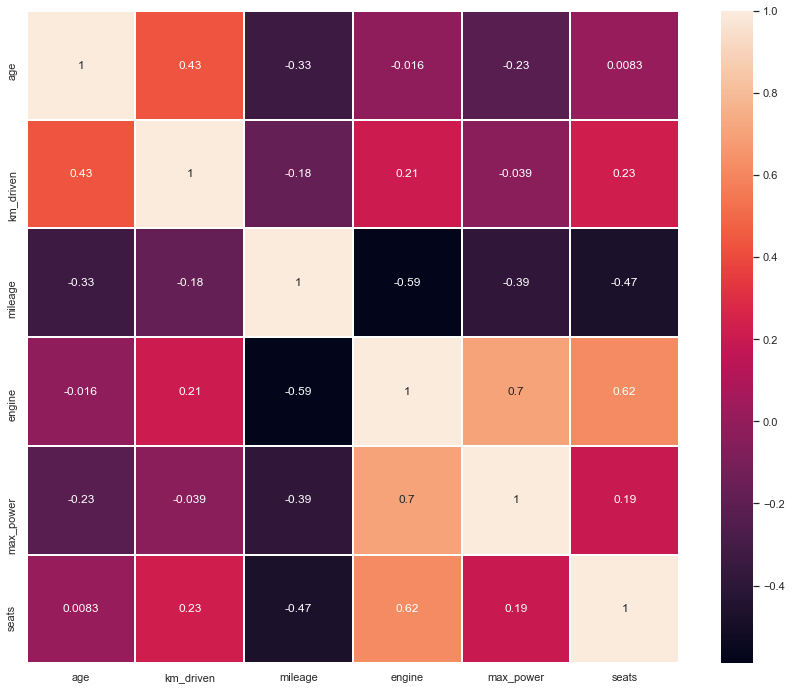

In [32]:
plt.figure(figsize=(15, 12))
sns.heatmap(df[numerical].corr(), linewidths=0.05, square=True, annot=True)
plt.show()

The heatmap displays the pearson correlation coefficients between two features. A largely-used absolute threshold value of __>0.7__ is used to indicate the presence of multicollinearity which does not occur between any two predictors in this dataset (although the coefficient between engine and max_power is close, but both features will be left in at this stage of the analysis).

## 4. Feature Engineering

In the following section, the dataset features will be preprocessed and prepared to ensure optimal performance of the models built in Section 5. The steps involved will be as follows:
- Creating test and training Set
- Standardization of continuous features
- One-hot encoding nominal categorical features
- Ordinal encoding ordinal categorical features

#### Creating Test and Training Set

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
# Creating new dataframe without model

df_model = df.drop(columns='model')
df_model.head()

,manufacturer,age,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,selling_price
0,Maruti,6,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5,450000
1,Skoda,6,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5,370000
2,Honda,14,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5,158000
3,Hyundai,10,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5,225000
4,Maruti,13,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5,130000


In [35]:
X = df_model.drop(columns='selling_price')
y = df_model['selling_price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,
                                                    stratify=X['manufacturer'])

In [36]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6311, 11)
(1578, 11)
(6311,)
(1578,)


#### Preprocessing

RobustScaler will be used for standardization as it is robust to outliers. The scaler removes the median and scales the data according to the interquartile range. Standardization will only be applied to continuous features and discrete numerical features (age, seats) will be treated as ordinal categorical features.

The categorical features will be one-hot encoded (each unique value in the column will be converted into a new feature that is assigned a binary value corresponding to the presence of that value in a particular instance) and ordinal encoded (each unique value is assigned an integer value corresponding to 'rank' of that value) if that feature contains values with intrinsic natural order. This is to allow algorithms to better understand the categorical variables to make more accurate predictions.

ColumnTransformer will be used to allow different features in the dataset to be transformed separately using different preprocessing techniques.

In [37]:
from sklearn.preprocessing import RobustScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import make_column_transformer

In [38]:
ss = RobustScaler()
ohe = OneHotEncoder(sparse=False)
oe = OrdinalEncoder(categories=[
    sorted(list(df_model['age'].value_counts().index)),                     # Categories for age
    ['First Owner', 'Second Owner', 'Third Owner', 'Fourth & Above Owner'], # Categories for owners
    sorted(list(df_model['seats'].value_counts().index))])                  # Categories for seats

# Note: categories='auto' did not work as expected, therefore a sorted value_counts().index list was used instead

In [39]:
ct = make_column_transformer(
    (ss, ['km_driven', 'mileage', 'engine', 'max_power']),
    (ohe, ['manufacturer', 'fuel', 'seller_type', 'transmission']),
    (oe, ['age', 'owner', 'seats']))

X_train = ct.fit_transform(X_train)
X_test = ct.fit_transform(X_test)

In [40]:
# Checking that the training and test sets have the same number of features
print(X_train.shape)
print(X_test.shape)

(6311, 44)
(1578, 44)


In [41]:
# Checking that endoding categorical variables worked
# Checking that RobustScaler set median values for continuous variables to 0
check_df = pd.DataFrame(X_train)
pd.set_option('display.max_columns', 85)
check_df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43
count,6311.000000,6311.000000,6311.000000,6311.000000,6311.000000,6311.000000,6311.000000,6311.000000,6311.000000,6311.000000,6311.000000,6311.000000,6311.000000,6311.000000,6311.000000,6311.000000,6311.000000,6311.000000,6311.000000,6311.000000,6311.000000,6311.000000,6311.000000,6311.000000,6311.000000,6311.000000,6311.000000,6311.000000,6311.000000,6311.000000,6311.000000,6311.000000,6311.000000,6311.000000,6311.000000,6311.000000,6311.000000,6311.000000,6311.000000,6311.000000,6311.000000,6311.000000,6311.000000,6311.000000
mean,0.144040,0.026131,0.540210,0.275926,0.000475,0.005071,0.014895,0.029155,0.008240,0.005229,0.000792,0.049121,0.059103,0.171447,0.000634,0.009032,0.003961,0.000475,0.000634,0.004278,0.095864,0.300111,0.006497,0.001743,0.010299,0.000951,0.028839,0.013152,0.090952,0.057360,0.023134,0.008556,0.006497,0.543179,0.004595,0.445730,0.140073,0.830296,0.029631,0.130566,0.869434,6.006972,0.434638,1.423071
std,0.832931,0.709548,1.305772,1.044356,0.021799,0.071032,0.121141,0.168255,0.090405,0.072128,0.028138,0.216137,0.235836,0.376929,0.025170,0.094613,0.062819,0.021799,0.025170,0.065273,0.294428,0.458342,0.080346,0.041716,0.100970,0.030822,0.167366,0.113933,0.287564,0.232548,0.150342,0.092112,0.080346,0.498172,0.067637,0.497085,0.347090,0.375402,0.169580,0.336951,0.336951,3.856287,0.702135,0.958274
min,-0.967726,-1.859206,-1.620779,-1.449190,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.419355,-0.454874,-0.132468,-0.410898,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,3.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000
75%,0.580645,0.545126,0.867532,0.589102,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,8.000000,1.000000,1.000000
max,23.225806,2.552347,6.119481,5.891016,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000,3.000000,6.000000


In [42]:
# Checking that ordinal encoder used the correct categories
for i in oe.categories:
    print(i)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
['First Owner', 'Second Owner', 'Third Owner', 'Fourth & Above Owner']
[4, 5, 6, 7, 8, 9, 10]


## 5. Model Building

The section below details the model building steps. Different regression algorithms will be utilized to identify the best model that will be able to predict used car prices most accurately from the test set. The algorithms tested in this analysis are:
>1. Linear Regression
2. Ridge
3. Lasso
4. Elastic-Net
5. Decision Tree
6. Random Forest
7. XGBoost
8. LightGBM
The performance of each algorithm will be evaluated with a five-fold cross-validation negative mean absolute error score (the mean score of the five folds will be taken).

Firstly, the algorithms will be tested without any hyperparameter tuning to provide baseline scores with default values. This is so that tuned model scores can be compared against the baseline to understand how much of an improvement the hyperparameter tuning makes.

Then, the optimal hyperparameters for each model will be found using a Grid Search or Randomized Search which is likely to increase the overall performance.

Finally, a Voting Regressor will be used to combine a selection of different regressors to balance out their individual weaknesses and produce an overall higher-performing model.

#### Baseline Models

In [43]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score, KFold


import warnings
warnings.filterwarnings('ignore')

In [44]:
# Defining cross-validation parameters
cv = KFold(5, shuffle=True, random_state=42)

In [45]:
# Initializing regressors in list
regressors = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    ElasticNet(),
    DecisionTreeRegressor(random_state=42),
    RandomForestRegressor(random_state=42),
    XGBRegressor(random_state=42),
    LGBMRegressor(random_state=42),
]

In [46]:
# Creating a list of baseline cross-validation scores
baseline_scores = [round(cross_val_score(i, X_train, y_train, cv=cv, scoring='neg_mean_absolute_error').mean(), 3) for i in regressors]

# Creating a list of classifier names
names = [i.__class__.__name__ for i in regressors]

# Creating a dataframe of the results
results = pd.DataFrame({'Model': names, 'Baseline Score': baseline_scores})
results

,Model,Baseline Score
0,LinearRegression,-161115.789
1,Ridge,-163841.045
2,Lasso,-161122.573
3,ElasticNet,-254251.776
4,DecisionTreeRegressor,-80298.379
5,RandomForestRegressor,-68049.646
6,XGBRegressor,-65684.774
7,LGBMRegressor,-72412.250


As expected, the linear models do not perform as well as the ensemble methods. The baseline results in the table above appear promising and the following section of the analysis will implement hyperparameter tuning to improve these cross-validation scores.

#### Hyperparameter Tuning

Grid Search and Randomized Search will be used to find the optimal values for hyperparameters of each of the algorithms tested above. Although an exhaustive grid search of every possible value for each hyperparameter would produce the most accurate model, that is a computationallly expensive process and will not be used in this analysis due to limitations with computational power. However, a reasonable range of values will still be tested and it is likely to improve the model nonetheless. Randomized Search with fifty iterations will be used for XGBoost and LightGBM as they are slower models and a Grid Search would require too much time.

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [48]:
# No tuning required for linear regression

lrg_grid = GridSearchCV(regressors[0], {}, cv=cv, scoring='neg_mean_absolute_error', n_jobs=-1)

lrg_grid.fit(X_train, y_train)

print(lrg_grid.best_params_)
print(lrg_grid.best_score_)


{}
-161115.78895396506


In [49]:
# Tuning Ridge

rdg_params = {
    'alpha': np.arange(0, 10, 0.1),
    'solver': ['svd', 'cholesky', 'lsqr', 'saga']
}

rdg_grid = GridSearchCV(regressors[1], rdg_params, cv=cv, scoring='neg_mean_absolute_error', n_jobs=-1)

rdg_grid.fit(X_train, y_train)

print(rdg_grid.best_params_)
print(rdg_grid.best_score_)

{'alpha': 0.1, 'solver': 'cholesky'}
-161383.38413431874


In [50]:
# Tuning Lasso

lss_params = {
    'alpha': np.arange(0, 10, 0.1)
}

lss_grid = GridSearchCV(regressors[2], lss_params, cv=cv, scoring='neg_mean_absolute_error', n_jobs=-1)

lss_grid.fit(X_train, y_train)

print(lss_grid.best_params_)
print(lss_grid.best_score_)

{'alpha': 0.0}
-161115.78895396442


In [51]:
# Tuning Elastic Net

eln_params = {
    'alpha': np.arange(0, 10, 0.1),
    'l1_ratio': np.arange(0, 1, 0.1)
}

eln_grid = GridSearchCV(regressors[3], eln_params, cv=cv, scoring='neg_mean_absolute_error', n_jobs=-1)

eln_grid.fit(X_train, y_train)

print(eln_grid.best_params_)
print(eln_grid.best_score_)

{'alpha': 0.0, 'l1_ratio': 0.0}
-161115.78895396442


In [52]:
# Tuning Decision Tree

dtr_params = {
    'criterion': ['mse', 'friedman_mse', 'mae', 'poisson'],
    'max_features': ['sqrt', 'log2', None]
}

dtr_grid = GridSearchCV(regressors[4], dtr_params, cv=cv, scoring='neg_mean_absolute_error', n_jobs=-1)

dtr_grid.fit(X_train, y_train)

print(dtr_grid.best_params_)
print(dtr_grid.best_score_)

{'criterion': 'mse', 'max_features': None}
-80298.37878649573


In [53]:
# Tuning Random Forest

rfr_params = {
    'n_estimators': np.arange(100, 2001, 100),
    'max_features': ['sqrt', 'log2', None]
}

rfr_grid = GridSearchCV(regressors[5], rfr_params, cv=cv, scoring='neg_mean_absolute_error', n_jobs=-1)

rfr_grid.fit(X_train, y_train)

print(rfr_grid.best_params_)
print(rfr_grid.best_score_)

{'max_features': None, 'n_estimators': 400}
-67993.69767861594


In [54]:
# Tuning XGBoost

xgb_params = {
    'n_estimators': np.arange(100, 2001, 10),
    'max_depth': np.arange(3, 16, 1),
    'learning_rate': np.arange(0, 1, 0.1),
    'gamma': [0.5, 1, 2],
    'min_child_weight': np.arange(0, 2.1, 0.5),
    'colsample_bytree': [0.3, 0.5, 0.7]
}

xgb_grid = RandomizedSearchCV(regressors[6], xgb_params, cv=cv, scoring='neg_mean_absolute_error', n_iter=50, random_state=0, n_jobs=-1)

xgb_grid.fit(X_train, y_train)

print(xgb_grid.best_params_)
print(xgb_grid.best_score_)

{'n_estimators': 660, 'min_child_weight': 1.0, 'max_depth': 9, 'learning_rate': 0.1, 'gamma': 1, 'colsample_bytree': 0.7}
-63134.72837879771


In [55]:
# Tuning LightGBM

lgb_params = {
    'boosting_type': ['gbdt', 'dart'],
    'max_depth': np.arange(3, 16, 1),
    'learning_rate': np.arange(0, 1, 0.1),
    'n_estimators': np.arange(100, 2001, 10),
    'min_child_weight': np.arange(0, 2.1, 0.5)
}


lgb_grid = RandomizedSearchCV(regressors[7], lgb_params, cv=cv, scoring='neg_mean_absolute_error', n_iter=50, random_state=0, n_jobs=-1)

lgb_grid.fit(X_train, y_train)

print(lgb_grid.best_params_)
print(lgb_grid.best_score_)

{'n_estimators': 870, 'min_child_weight': 2.0, 'max_depth': 11, 'learning_rate': 0.30000000000000004, 'boosting_type': 'dart'}
-64396.625407603395


In [56]:
# Comparing tuned scores with baseline scores

grid_names = [
    lrg_grid,
    rdg_grid,
    lss_grid,
    eln_grid,
    dtr_grid,
    rfr_grid,
    xgb_grid,
    lgb_grid   
]

tuned_scores = [round(i.best_score_, 3) for i in grid_names]

results['Tuned Score'] = tuned_scores

results

,Model,Baseline Score,Tuned Score
0,LinearRegression,-161115.789,-161115.789
1,Ridge,-163841.045,-161383.384
2,Lasso,-161122.573,-161115.789
3,ElasticNet,-254251.776,-161115.789
4,DecisionTreeRegressor,-80298.379,-80298.379
5,RandomForestRegressor,-68049.646,-67993.698
6,XGBRegressor,-65684.774,-63134.728
7,LGBMRegressor,-72412.250,-64396.625


Hyperparameter tuning has resulted in an improvement in the scores for every model tested (with the exception on Linear Regression which did not require tuning). The scores could be further improved with greater computational power, allowing a grid search of a larger range of values to be completed in a shorter amount of time.

#### Voting Regressor

In the following section, a Voting Regressor will be used to ensemble a selection of the better performing models tested above to balance out their individual weaknesses and produce an overall higher-performing model.

The three best models - Random Forest, XGBoost and LightGBM - will be ensembled.

In [57]:
from sklearn.ensemble import VotingRegressor

In [58]:
# Baseline Voting Regressor

rfr = rfr_grid.best_estimator_
xgb = xgb_grid.best_estimator_
lgb = lgb_grid.best_estimator_

vr = VotingRegressor([('rfr', rfr), ('xgb', xgb), ('lgb', lgb)], n_jobs=-1)

voting_score = round(cross_val_score(vr, X_train, y_train, cv=cv, scoring='neg_mean_absolute_error').mean(), 3)

voting_score

-62755.633

In [59]:
results = results.append({'Model': vr.__class__.__name__, 'Baseline Score': voting_score}, ignore_index=True)
results

,Model,Baseline Score,Tuned Score
0,LinearRegression,-161115.789,-161115.789
1,Ridge,-163841.045,-161383.384
2,Lasso,-161122.573,-161115.789
3,ElasticNet,-254251.776,-161115.789
4,DecisionTreeRegressor,-80298.379,-80298.379
5,RandomForestRegressor,-68049.646,-67993.698
6,XGBRegressor,-65684.774,-63134.728
7,LGBMRegressor,-72412.250,-64396.625
8,VotingRegressor,-62755.633,NaN


The weighting of each of the models in the ensemble can also be tuned with a grid search to understand if certain models should be emphasized more than others.

In [60]:
# Tuning Voting Regressor

vr_params = {
    'weights': [(1, 1, 1),
                (2, 1, 1),
                (1, 2, 1),
                (1, 1, 2)
               ]}

vr_grid = GridSearchCV(vr, vr_params, cv=cv, scoring='neg_mean_absolute_error', n_jobs=-1)

vr_grid.fit(X_train, y_train)

print(vr_grid.best_params_)
print(vr_grid.best_score_)

{'weights': (1, 2, 1)}
-62391.96819924151


In [61]:
results.iloc[8,2] = round(vr_grid.best_score_, 3)
results.style.highlight_max(subset='Tuned Score', color='lightgreen')

,Model,Baseline Score,Tuned Score
0,LinearRegression,-161115.789000,-161115.789000
1,Ridge,-163841.045000,-161383.384000
2,Lasso,-161122.573000,-161115.789000
3,ElasticNet,-254251.776000,-161115.789000
4,DecisionTreeRegressor,-80298.379000,-80298.379000
5,RandomForestRegressor,-68049.646000,-67993.698000
6,XGBRegressor,-65684.774000,-63134.728000
7,LGBMRegressor,-72412.250000,-64396.625000
8,VotingRegressor,-62755.633000,-62391.968000


An tuned ensemble of Random Forest, XGBoost and LightGBM regressors using Voting Regressor with XGBoost carrying double the weighting was able to improve the overall model score to become the best-performing model with the lowest mean absolute error.

This model will be used in the following sections to generate predictions of used car prices from the test set.

#### Results

The three best-performing models in the cross-validation test above (XGBoost, LightGBM, Voting Regressor) will be used to predict used car prices using the test set in this section. The accuracy of the models will be evaluated using the following metrics:
- Root Mean Squared Error (RMSE)
- Mean Absolute Error (MAE)
- Coefficient of Determination (R2)

MAE is the average difference between the predicted used car prices and the actual used car prices and RMSE is the square root of the average of squared prediction errors. Both provide a meaure of the accuracy of the model in predicting the used car prices.

R2 is the proportion of the variance in the target used car prices that can be explained by the features in the model, therefore providing a meaure of how well the model fits to the data.

In [62]:
from sklearn import metrics

In [63]:
best_models = [
    xgb_grid,
    lgb_grid,
    vr_grid
]

predictors = [i.predict(X_test) for i in best_models]

In [64]:
# RMSE
rmse = [round(np.sqrt(metrics.mean_squared_error(y_test, i)), 2) for i in predictors]

# MAE
mae = [round(metrics.mean_absolute_error(y_test, i), 2) for i in predictors]

# R2
r2 = [round(metrics.r2_score(y_test, i), 3) for i in predictors]

In [65]:
model_names = ['XGBoost', 'LightGBM', 'VotingRegressor']

model_scores = pd.DataFrame({
    'Model': model_names,
    'RMSE': rmse,
    'MAE': mae,
    'R2': r2
})

model_scores.style\
.highlight_min(subset=['RMSE', 'MAE'], color='lightgreen')\
.highlight_max(subset='R2', color='lightgreen')

,Model,RMSE,MAE,R2
0,XGBoost,210626.980000,88383.030000,0.934000
1,LightGBM,243354.210000,90342.230000,0.912000
2,VotingRegressor,207561.400000,83452.410000,0.936000


As with the validation set, the Voting Regressor model also produced the best performance with the test set, showing the lowest RMSE and MAE (which are rupees) and the highest R-squared score as indicated in the table above.

This model can predict used car prices the most accurately out of the algorithms tested and can be used going forward to price any cars that have not yet been sold.

#### Saving the model

In [66]:
import joblib

In [67]:
joblib.dump(vr_grid, 'model.joblib')

['model.joblib']

## 6. Conclusion

#### Summary

In this project, the objective was to be able to predict the price of a used car in India based on its features. The dataset obtained was cleaned to become more usable for analysis and explored to provide a better understanding of the distribution and relationships between variables. Then, feature engineering was performed to prepare the data for machine learning algorithms and models using various different algorithms were built and tested. An ensemble was created out of the three highest-scoring models and this was able to predict used car prices most accurately from the test data.

The final results achived were:
- Root Mean Squared Error - __207,561 Rupees__
- Mean Absolute Error - __83,452 Rupees__
- Coefficient of Determination - __0.936__

#### Future Work

Although strong results were obtained from this study, there are areas where improvements could be made in the future to create even better models to make more accurate predictions of used car prices in India. These are listed below:
- A grid search of a larger range of values could find more optimal hyperparameters for each of the algorithms but greater computational power would be needed which was a limiting factor in this analysis
- More regression algorithms could be tested and perhaps added to the ensemble which could increase overall performance
- More data (more entries in the dataset and even extra features) on used cars sold can be obtained to better train the model, especially if more samples of the rarer features (e.g. the 14-seater car or less popular manufacturers) were added to the dataset.